<a href="https://colab.research.google.com/github/sanairac/Causal-effect/blob/master/4_2_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.6 MB/s eta 0:00:00


In [2]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=f937840db2034b7158095eb3d34eeda4b310f27ad5af3da277e833146efe1f30
  Stored in directory: /root/.cache/pip/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas_ta


In [3]:
pip install yfinance==0.2.47

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.0/101.0 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.52
    Uninstalling yfinance-0.2.52:
      Successfully uninstalled yfinance-0.2.52


In [4]:
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import mplfinance as mpf

In [6]:
data = yf.download('AAPL', period = '6mo',
                   interval = '1d')
data

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-08-12 00:00:00+00:00,217.052292,217.529999,219.509995,215.600006,216.070007,38028100
2024-08-13 00:00:00+00:00,220.784088,221.270004,221.889999,219.009995,219.009995,44155300
2024-08-14 00:00:00+00:00,221.233093,221.720001,223.029999,219.699997,220.570007,41960600
2024-08-15 00:00:00+00:00,224.226501,224.720001,225.350006,222.759995,224.600006,46414000
2024-08-16 00:00:00+00:00,225.553589,226.050003,226.830002,223.649994,223.919998,44340200
...,...,...,...,...,...,...
2025-02-06 00:00:00+00:00,232.963867,233.220001,233.800003,230.429993,231.289993,29925300
2025-02-07 00:00:00+00:00,227.380005,227.630005,234.000000,227.259995,232.600006,39707200
2025-02-10 00:00:00+00:00,227.649994,227.649994,230.589996,227.199997,229.570007,33115600


In [7]:
data['SMA20'] = data['Close'].rolling(window = 20).mean()
data['SMA50'] = data['Close'].rolling(window = 50).mean()
data['EMA20'] = data['Close'].ewm(span = 20, adjust = False).mean()
data['Upper_BB'], data['Lower_BB'] = data['SMA20'] + 2*data['Close'].rolling(20).std(), data['SMA20'] - 2*data['Close'].rolling(20).std()


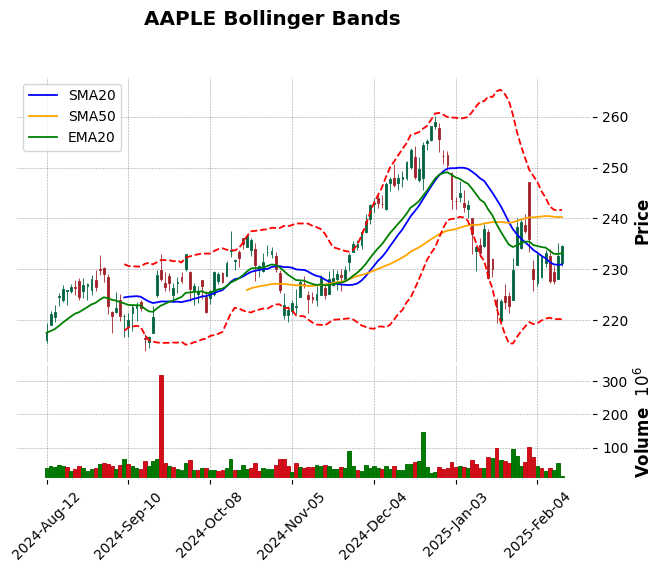

In [8]:
add_plot = [
    mpf.make_addplot(data['SMA20'], color = 'blue', label = 'SMA20'),
    mpf.make_addplot(data['SMA50'], color = 'orange', label = 'SMA50'),
    mpf.make_addplot(data['EMA20'], color = 'green', label = 'EMA20'),
    mpf.make_addplot(data['Upper_BB'], color = 'red', linestyle = '--'),
    mpf.make_addplot(data['Lower_BB'], color = 'red', linestyle = '--'),
]
mpf.plot(data, type = 'candle', volume = True, addplot = add_plot,
         style = 'charles', title = 'AAPLE Bollinger Bands')